## Hypothesis Testing

### Question 1
A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.(Minitab File : Cutlets.mtw)


### Answer
+ 1)Assumptions:
   - The samples collected from both units are randomly selected.
   - The diameters of the cutlets in each unit are normally distributed.
   - The variances of the diameters in both units are equal.

+ 2)Hypotheses:
   Let's denote the population mean diameters of cutlets in Unit A and Unit B as μ1 and μ2, respectively.
   - Null hypothesis(H0):μ1=μ2 (There is no significant difference in the mean diameters of the cutlets between the two units.)
   - Alternative hypothesis(H1):μ1≠ μ2(There is a significant difference in the mean diameters of the cutlets between the two units.)

+ 3)Test:
   To test the hypothesis, we can use the two-sample t-test. This test compares the means of two independent samples to determine if they are significantly different.

+ 4)Analysis:
   By conducting the two-sample t-test we can obtain the test statistic and p-value. The test will assume equal variances between the two samples.

+ 5)Interpretation:
   Based on the p-value obtained from the test, we can compare it with the significance level (α = 0.05) to make a decision. If the p-value is less than the significance level, we reject the null hypothesis and conclude that there is a significant difference in the mean diameters of the cutlets between the two units. If the p-value is greater than or equal to the significance level, we fail to reject the null hypothesis and conclude that there is insufficient evidence to suggest a significant difference.

In [1]:
#importing necessary libraries
import pandas as pd
import scipy.stats as stats

In [2]:
#calling the dataset
Cutlets=pd.read_csv(r"C:\Users\Linta Stephen\Downloads\ExcelR\Assignments\3.Hypothesis Testing\Cutlets.csv")
Cutlets.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [3]:
#checking the basic information
Cutlets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


In [4]:
#checking for null values
Cutlets.isnull().sum()

Unit A    0
Unit B    0
dtype: int64

In [5]:
#checking for duplicates
Cutlets.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
dtype: bool

In [6]:
Cutlets.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


###### Inference
+ From the above outputs we can see that the dataset doesnot contain any null values and duplicate values.
+ There are total 35 entries and the datatype is float.
+ The minimum values are 6.437 for Unit A & 6.038 for Unit B.
+ The maximum values are 7.516 for Unit A & 7.545 for Unit B.
+ Mean values for both the Units are approximately same.

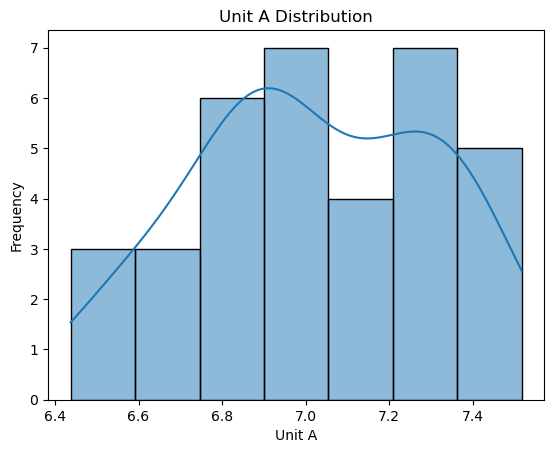

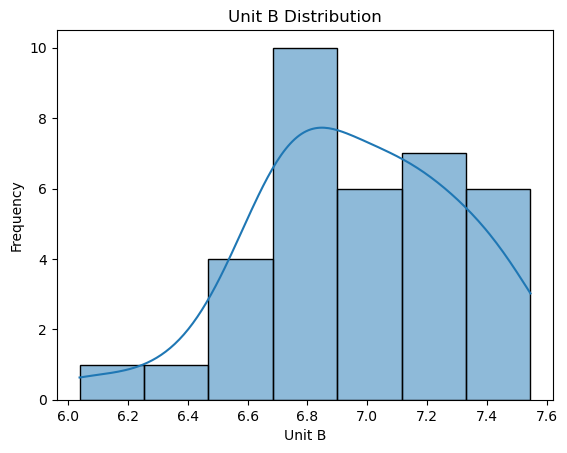

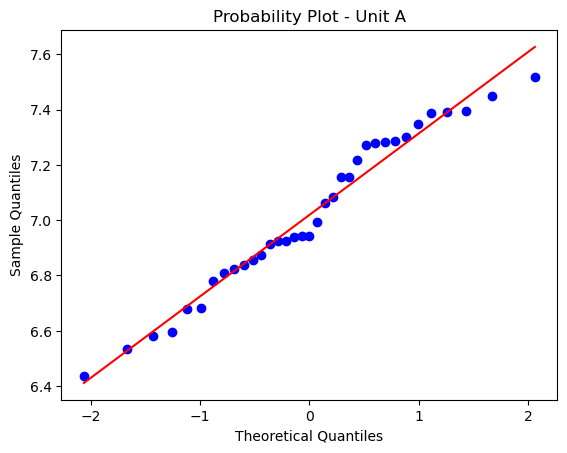

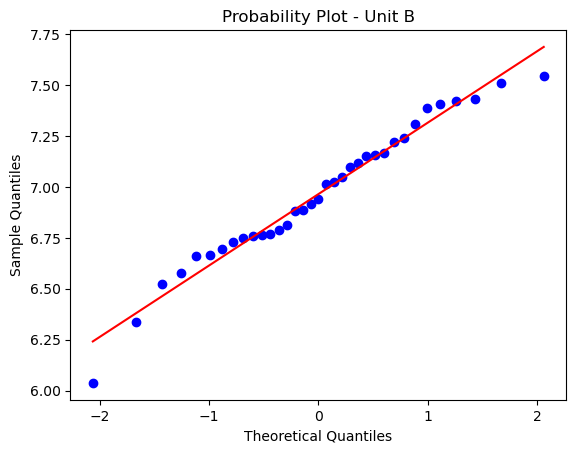

In [7]:
#Plotting the graph
#import libraries
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import probplot

# Extract the data from each unit
Unit_A=Cutlets['Unit A']
Unit_B=Cutlets['Unit B']

# Create a histogram for Unit A
sns.histplot(Unit_A,kde=True)
plt.title('Unit A Distribution')
plt.xlabel('Unit A')
plt.ylabel('Frequency')
plt.show()

# Create a histogram for Unit B
sns.histplot(Unit_B,kde=True)
plt.title('Unit B Distribution')
plt.xlabel('Unit B')
plt.ylabel('Frequency')
plt.show()

# Create a probability plot for Unit A
probplot(Unit_A,plot=plt)
plt.title('Probability Plot - Unit A')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

# Create a probability plot for Waist
probplot(Unit_B,plot=plt)
plt.title('Probability Plot - Unit B')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

In [8]:
# Check the assumptions
# Assumption 1: The data in each sample should be independent and randomly selected.

# Assumption 2: The data should be normally distributed within each population.
# We can use Shapiro-Wilk test to check the normality assumption.

_,p1=stats.shapiro(Unit_A)
_,p2=stats.shapiro(Unit_B)

# Check if both p-values are greater than 0.05 (significance level)
if p1>0.05 and p2>0.05:
    print("Both samples are normally distributed.")
else:
    print("At least one sample is not normally distributed.")

# Assumption 3: The variances of the two populations should be equal.
# We can use Levene's test to check the equality of variances.

_,p=stats.levene(Unit_A,Unit_B)

# Check if p-value is greater than 0.05 (significance level)
if p>0.05:
    print("The variances of the two populations are equal.")
else:
    print("The variances of the two populations are not equal.")

# Perform the hypothesis test
# Use a two-sample independent t-test assuming equal variances
_,p_value=stats.ttest_ind(Unit_A,Unit_B,equal_var=True)

# Check if the p-value is less than 0.05 (significance level)
if p_value<0.05:
    print("There is a significant difference in the diameter of the cutlets between the two units.")
else:
    print("There is no significant difference in the diameter of the cutlets between the two units.")

Both samples are normally distributed.
The variances of the two populations are equal.
There is no significant difference in the diameter of the cutlets between the two units.


###### Inference
From the result we can see that we fail to reject the null hypothesis. Therefore F&B Manager can conclude that there is no significant difference in the diameter of the cutlets between the two units.

###############################################################################################################################

## Question 2
A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.(Minitab File: LabTAT.mtw)


## Answer
To analyze the data and determine if there is a significant difference in the average TAT (Turn Around Time) among the different laboratories,we can perform an analysis of variance (ANOVA) test.
+ 1)State the hypotheses:
   - Null hypothesis(H0):There is no significant difference in the average TAT among the laboratories.
   - Alternative hypothesis(Ha):There is a significant difference in the average TAT among the laboratories.

+ 2)Set the significance level (α) to 0.05 (5%).

+ 3)Collect the data for the TAT of reports from the four laboratories.

+ 4)Calculate the descriptive statistics:
   - Compute the sample mean, sample standard deviation, and sample size for each laboratory.

+ 5)Perform the ANOVA test:
   - Using the ANOVA test, compare the variability between the laboratory groups to the variability within the groups.
   - This test will provide an F-statistic and a corresponding p-value.

+ 6)Make a decision:
   - If the p-value is less than the significance level (α), reject the null hypothesis and conclude that there is a significant difference in the average TAT among the laboratories.
   - If the p-value is greater than the significance level (α), fail to reject the null hypothesis and conclude that there is no significant difference in the average TAT among the laboratories.

In [9]:
#calling the dataset
Labtat=pd.read_csv(r'C:\Users\Linta Stephen\Downloads\ExcelR\Assignments\3.Hypothesis Testing\LabTAT.csv')
Labtat.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


In [10]:
#checking the basic information
Labtat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laboratory 1  120 non-null    float64
 1   Laboratory 2  120 non-null    float64
 2   Laboratory 3  120 non-null    float64
 3   Laboratory 4  120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


In [11]:
#checking for null values
Labtat.isnull().sum()

Laboratory 1    0
Laboratory 2    0
Laboratory 3    0
Laboratory 4    0
dtype: int64

In [12]:
#checking for duplicates
Labtat.duplicated().sum()

0

In [13]:
#descriptive statistics
Labtat.describe()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


In [14]:
Labtat.nunique()

Laboratory 1    119
Laboratory 2    119
Laboratory 3    120
Laboratory 4    117
dtype: int64

In [15]:
#checking for outliers
Q1=Labtat.quantile(0.25)
Q3=Labtat.quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

# Identify outliers 
Outliers_IQR=Labtat[(Labtat<lower_bound)|(Labtat>upper_bound)]

# Print the outliers
print("\nOutliers based on IQR method:")
print(Outliers_IQR)


Outliers based on IQR method:
     Laboratory 1  Laboratory 2  Laboratory 3  Laboratory 4
0             NaN           NaN           NaN           NaN
1             NaN           NaN           NaN           NaN
2             NaN           NaN           NaN           NaN
3             NaN           NaN           NaN           NaN
4             NaN           NaN           NaN           NaN
..            ...           ...           ...           ...
115           NaN           NaN           NaN           NaN
116           NaN           NaN           NaN           NaN
117           NaN           NaN           NaN           NaN
118           NaN           NaN           NaN           NaN
119           NaN           NaN           NaN           NaN

[120 rows x 4 columns]


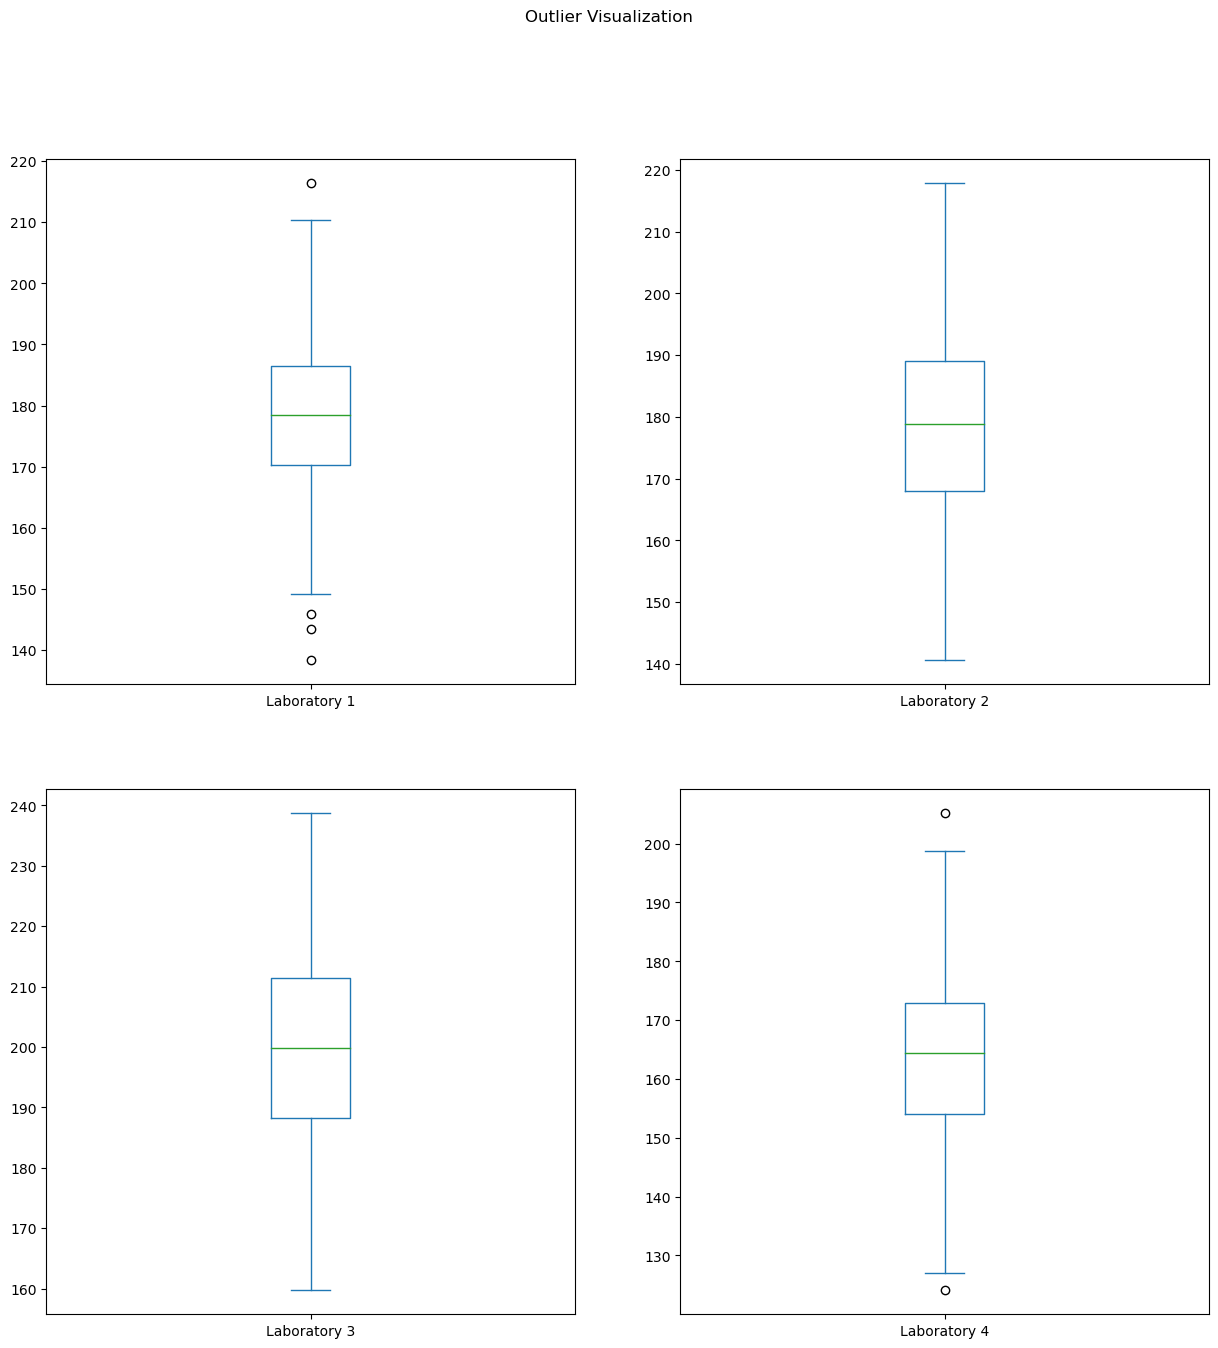

In [16]:
#checking outlier visually
Labtat.plot(kind='box',subplots=True,layout=(2,2),figsize=(15,15),title='Outlier Visualization')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

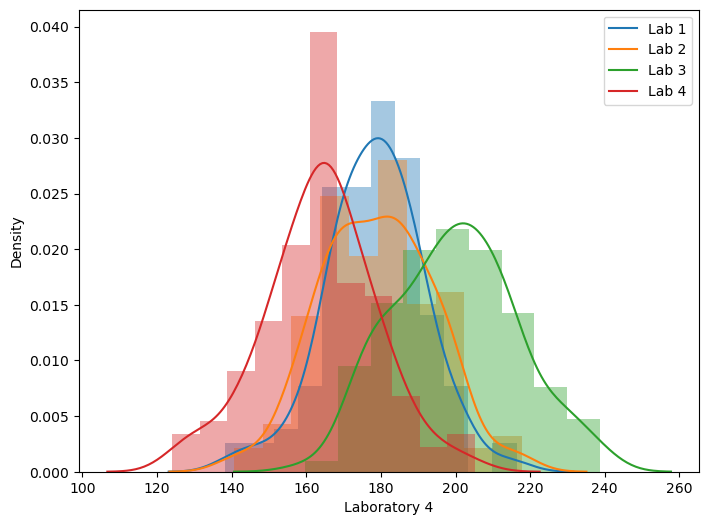

In [17]:
plt.figure(figsize=(8,6))
labels=['Lab 1','Lab 2','Lab 3','Lab 4']
sns.distplot(Labtat['Laboratory 1'], kde = True)
sns.distplot(Labtat['Laboratory 2'],hist = True)
sns.distplot(Labtat['Laboratory 3'],hist = True)
sns.distplot(Labtat['Laboratory 4'],hist = True)
plt.legend(labels)

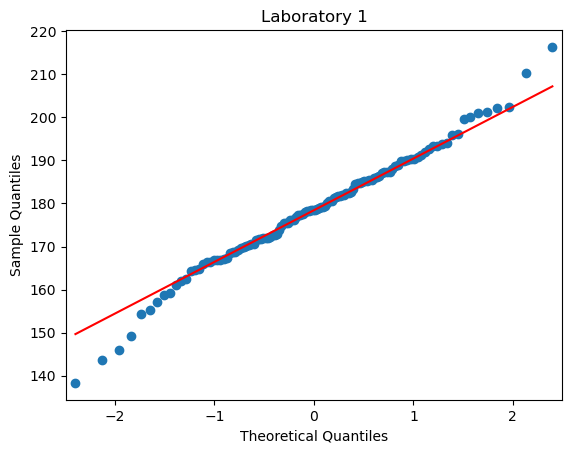

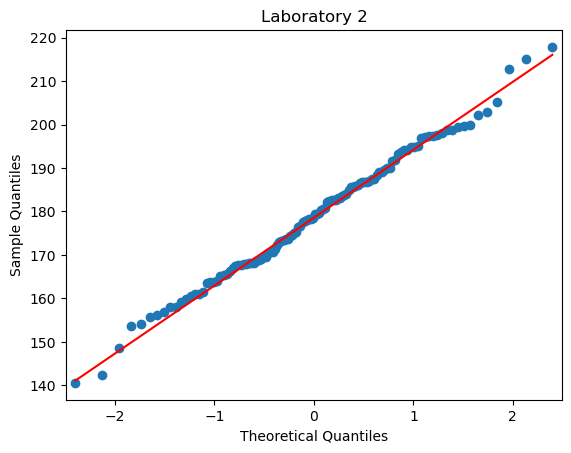

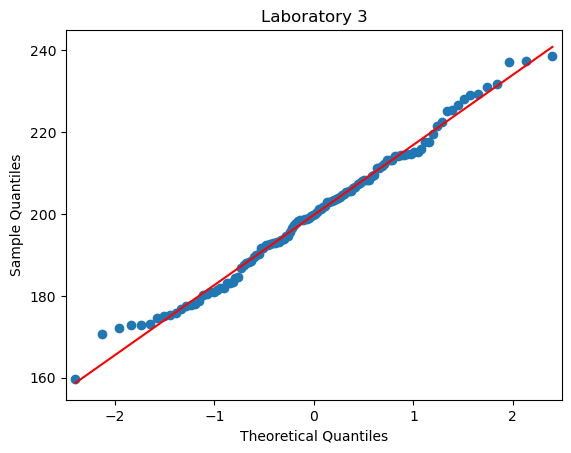

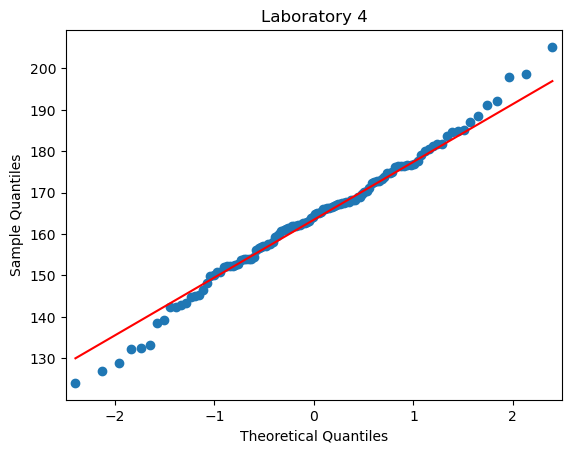

In [18]:
#checking whether the data follows normal distribution
import statsmodels.api as sm

sm.qqplot(Labtat['Laboratory 1'],line='q')
plt.title('Laboratory 1')
sm.qqplot(Labtat['Laboratory 2'],line='q')
plt.title('Laboratory 2')
sm.qqplot(Labtat['Laboratory 3'],line='q')
plt.title('Laboratory 3')
sm.qqplot(Labtat['Laboratory 4'],line='q')
plt.title('Laboratory 4')
plt.show()

###### Inference
+ There are 4 columns and 120 rows in the dataset.
+ No null values and duplicate values are present.
+ Some outliers are present in column: 'Laboratory 1' & 'Laboratory 4'.
+ The data is normally distributed.

In [19]:
from scipy.stats import f_oneway

# Extract the TAT values for each laboratory
lab1=Labtat['Laboratory 1']
lab2=Labtat['Laboratory 2']
lab3=Labtat['Laboratory 3']
lab4=Labtat['Laboratory 4']

# Perform the ANOVA test
f_statistic,p_value=f_oneway(lab1,lab2,lab3,lab4)

# Print the results
print("F-statistic:",f_statistic)
print("p-value:",p_value)

# Set the significance level
alpha=0.05

# Check if the p-value is less than the significance level
if p_value<alpha:
    print("There is a significant difference in average TAT among the different laboratories.")
else:
    print("There is no significant difference in average TAT among the different laboratories.")

F-statistic: 118.70421654401437
p-value: 2.1156708949992414e-57
There is a significant difference in average TAT among the different laboratories.


###### Inference
From the ANOVA test the hospital can conclude the there is a significant difference in the average TAT among different laboratories.

###############################################################################################################################

## Question 3
Sales of products in four different regions is tabulated for males and females. Find if male-female buyer rations are similar across regions.
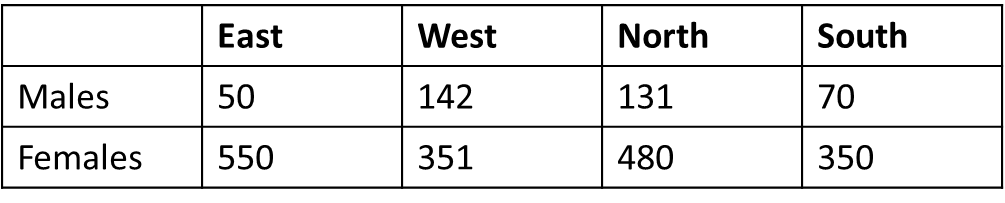


## Answer
+ 1)Set up the hypothesis:
   - Null Hypothesis (H₀): All proportions are equal
   - Alternative Hypothesis (H₁): Not all Proportions are equal

+ 2)Collect and organize your data.

+ 3)Calculate the expected values.

+ 4)Perform the Chi-square test:
   Calculate the Chi-square test statistic using the observed and expected values.

+ 5)Determine the degrees of freedom:
   
+ 6)Look up the critical value:
   Use the degrees of freedom to find the critical value from the Chi-square distribution table at the desired significance level (e.g., 0.05).

+ 7)Compare the test statistic to the critical value:
   If the test statistic is greater than the critical value, reject the null hypothesis. Otherwise, fail to reject the null hypothesis.

+ 8)Interpret the results:
   If we reject the null hypothesis, it indicates that,not all proportions are equal . If you fail to reject the null hypothesis, it suggests that, Proportions are similar across regions.

In [20]:
Buyer_Ratio=pd.read_csv(r'C:\Users\Linta Stephen\Downloads\ExcelR\Assignments\3.Hypothesis Testing\BuyerRatio.csv')
Buyer_Ratio.head()

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [21]:
import numpy as np
from scipy.stats import chi2_contingency

# Observed values
observed_values=np.array([[50, 142, 131, 70], [435, 1523, 1356, 750]])

# Perform chi-square test of independence
chi2,p,dof,expected_values=chi2_contingency(observed_values)

# Define significance level
alpha=0.05

# Print the results
print("Chi-square statistic:",chi2)
print("Degrees of freedom:",dof)
print("p-value:",p)

if p<alpha:
    print("Reject null hypothesis. Not all proportions are equal.")
else:
    print("Fail to reject null hypothesis. Proportions are similar across regions.")

Chi-square statistic: 1.595945538661058
Degrees of freedom: 3
p-value: 0.6603094907091882
Fail to reject null hypothesis. Proportions are similar across regions.


###### Inference
From the test we can conclude that male-female buyer ratio proportions are similar across regions

###############################################################################################################################

## Question 4
TeleCall uses 4 centers around the globe to process customer order forms. They audit a certain %  of the customer order forms. Any error in order form renders it defective and has to be reworked before processing.  The manager wants to check whether the defective %  varies by centre. Please analyze the data at 5% significance level and help the manager draw appropriate inferences.(Minitab File: CustomerOrderForm.mtw)

## Answer
+ 1)Formulate the hypothesis:
   - Null hypothesis (H0): The defective percentage is the same across all centers.
   - Alternative hypothesis (H1): The defective percentage varies by center.

+ 2)Collect the necessary data:
   
+ 3)Choose an appropriate statistical test:
   - In this case, since we want to compare the defective percentages across multiple centers, you can use the chi-square test for independence. This test is suitable for analyzing categorical data.

+ 4)Set the significance level:
   - The significance level, also known as alpha (α), determines the threshold for rejecting the null hypothesis. In this case, it's given as 5% (0.05).

+ 5)Perform the statistical test:
   - Conduct a chi-square test for independence.
   - The test will calculate a test statistic and provide a p-value.

+ 6)Interpret the results:
   - If the p-value is less than the significance level (0.05), we can reject the null hypothesis and conclude that there is evidence that the defective percentage varies by center.
   - If the p-value is greater than or equal to the significance level, we fail to reject the null hypothesis, suggesting that there is insufficient evidence to conclude that the defective percentage varies by center.

In [22]:
Customer_Order_Form=pd.read_csv(r'C:\Users\Linta Stephen\Downloads\ExcelR\Assignments\3.Hypothesis Testing\Costomer+OrderForm.csv')
Customer_Order_Form.head()

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free


In [23]:
Customer_Order_Form.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Phillippines  300 non-null    object
 1   Indonesia     300 non-null    object
 2   Malta         300 non-null    object
 3   India         300 non-null    object
dtypes: object(4)
memory usage: 9.5+ KB


In [24]:
Customer_Order_Form.isnull().sum()

Phillippines    0
Indonesia       0
Malta           0
India           0
dtype: int64

In [25]:
Customer_Order_Form.describe()

,Phillippines,Indonesia,Malta,India
count,300,300,300,300
unique,2,2,2,2
top,Error Free,Error Free,Error Free,Error Free
freq,271,267,269,280


In [26]:
Customer_Order_Form.nunique()

Phillippines    2
Indonesia       2
Malta           2
India           2
dtype: int64

In [27]:
# Observed values
observed_values=np.array([[271,267,269,280], [29,33,31,20]])

# Perform chi-square test of independence
chi2,p,dof,expected_values=chi2_contingency(observed_values)

# Define significance level
alpha=0.05

# Print the results
print("Chi-square statistic:",chi2)
print("Degrees of freedom:",dof)
print("p-value:",p)
print("Expected values:",expected_values)

if p<alpha:
    print("Reject null hypothesis.The defective percentage varies by center.")
else:
    print("Fail to reject null hypothesis.The defective percentage is the same across all centers.")

Chi-square statistic: 3.858960685820355
Degrees of freedom: 3
p-value: 0.2771020991233135
Expected values: [[271.75 271.75 271.75 271.75]
 [ 28.25  28.25  28.25  28.25]]
Fail to reject null hypothesis.The defective percentage is the same across all centers.


###### Inference
From the test manager can conclude that the defective percentage is same across all the centers.